In [22]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)


In [24]:
def f_forward(x, w1, w2):
    z1 = np.dot(x, w1)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2)
    a2 = sigmoid(z2)
    return a1, a2


In [25]:
def back_prop(x, y, w1, w2, a1, a2, lr):
    error = a2 - y
    d2 = error * sigmoid_deriv(a2)
    dw2 = np.outer(a1, d2)

    d1 = np.dot(w2, d2) * sigmoid_deriv(a1)
    dw1 = np.outer(x, d1)

    w1 -= lr * dw1
    w2 -= lr * dw2
    return w1, w2


In [26]:
def train(x, y, w1, w2, lr=0.1, epochs=100):
    acc_list = []
    loss_list = []
    for _ in range(epochs):
        correct = 0
        loss = 0
        for i in range(len(x)):
            a1, a2 = f_forward(x[i], w1, w2)
            pred = np.argmax(a2)
            true = np.argmax(y[i])
            if pred == true:
                correct += 1
            loss += mse_loss(a2, y[i])
            w1, w2 = back_prop(x[i], y[i], w1, w2, a1, a2, lr)
        acc_list.append(correct / len(x))
        loss_list.append(loss / len(x))
    return acc_list, loss_list, w1, w2


In [27]:
def predict(x, w1, w2):
    _, out = f_forward(x, w1, w2)
    return np.argmax(out)


In [28]:
def create_letter_A():
    return np.array([
        [0,1,1,1,1,0],
        [1,0,0,0,0,1],
        [1,0,0,0,0,1],
        [1,1,1,1,1,1],
        [1,0,0,0,0,1]
    ]).flatten()

def create_letter_B():
    return np.array([
        [1,1,1,1,0,0],
        [1,0,0,0,1,0],
        [1,1,1,1,0,0],
        [1,0,0,0,1,0],
        [1,1,1,1,0,0]
    ]).flatten()

def create_letter_C():
    return np.array([
        [0,1,1,1,1,0],
        [1,0,0,0,0,1],
        [1,0,0,0,0,0],
        [1,0,0,0,0,1],
        [0,1,1,1,1,0]
    ]).flatten()


In [29]:
def add_noise(x, level=0.1):
    return np.clip(x + level * np.random.randn(*x.shape), 0, 1)

x = []
y = []
A = create_letter_A()
B = create_letter_B()
C = create_letter_C()

for _ in range(100):
    x.append(add_noise(A))
    y.append([1, 0, 0])
    x.append(add_noise(B))
    y.append([0, 1, 0])
    x.append(add_noise(C))
    y.append([0, 0, 1])

x = np.array(x)
y = np.array(y)


In [30]:
np.random.seed(42)
w1 = np.random.randn(30, 20)
w2 = np.random.randn(20, 3)


In [31]:
acc, loss, w1, w2 = train(x, y, w1, w2, lr=0.1, epochs=100)


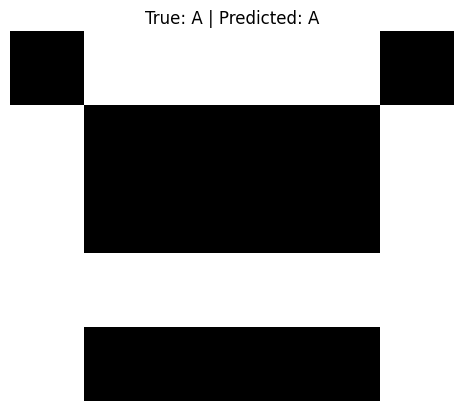

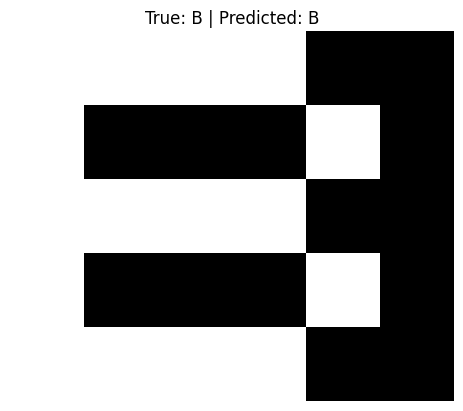

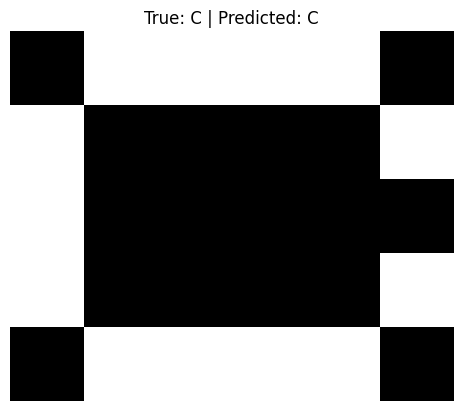

In [32]:
letters = [create_letter_A(), create_letter_B(), create_letter_C()]
labels = ['A', 'B', 'C']

for letter, true_label in zip(letters, labels):
    pred_index = predict(letter, w1, w2)
    pred_label = ['A', 'B', 'C'][pred_index]
    
    plt.imshow(letter.reshape(5, 6), cmap='gray')
    plt.title(f"True: {true_label} | Predicted: {pred_label}")
    plt.axis('off')
    plt.show()

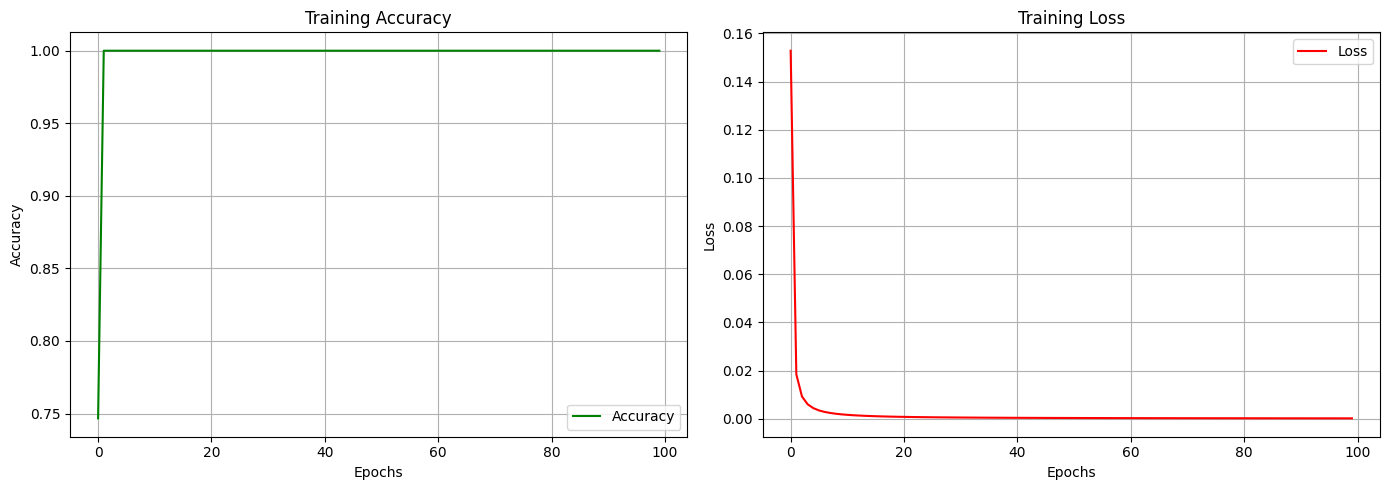

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(acc, color='green', label='Accuracy')
axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)
axs[0].legend()


axs[1].plot(loss, color='red', label='Loss')
axs[1].set_title('Training Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()
